In [67]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sqlite3
import matplotlib.pyplot as plt


Credit to Stockanalysis.com for providing this public data to us

In [47]:
page  = requests.get("https://stockanalysis.com/list/biggest-companies/")
page.content


b'<!DOCTYPE html>\n<html lang="en">\n\t<head>\n\t\t<meta charset="utf-8" />\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1" />\n\t\t\n\t\t<link href="../../_app/immutable/assets/0.9917b73d.css" rel="stylesheet">\n\t\t<link href="../../_app/immutable/assets/___StockTable.f29087bf.css" rel="stylesheet"><title>All U.S. Listed Stocks, Ranked by Market Cap - Stock Analysis</title><!-- HEAD_svelte-1ipx2c_START --><meta name="description" content="A list of all stocks listed on the NASDAQ, NYSE and NYSE American in the United States, sorted by market cap and updated daily."><meta name="robots" content="index, follow"><link rel="canonical" href="https://stockanalysis.com/list/biggest-companies/"><meta property="og:title" content="All U.S. Listed Stocks, Ranked by Market Cap - Stock Analysis"><meta property="og:description" content="A list of all stocks listed on the NASDAQ, NYSE and NYSE American in the United States, sorted by market cap and updated daily."><meta prop

In [48]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="../../_app/immutable/assets/0.9917b73d.css" rel="stylesheet"/>
  <link href="../../_app/immutable/assets/___StockTable.f29087bf.css" rel="stylesheet"/>
  <title>
   All U.S. Listed Stocks, Ranked by Market Cap - Stock Analysis
  </title>
  <!-- HEAD_svelte-1ipx2c_START -->
  <meta content="A list of all stocks listed on the NASDAQ, NYSE and NYSE American in the United States, sorted by market cap and updated daily." name="description"/>
  <meta content="index, follow" name="robots"/>
  <link href="https://stockanalysis.com/list/biggest-companies/" rel="canonical"/>
  <meta content="All U.S. Listed Stocks, Ranked by Market Cap - Stock Analysis" property="og:title"/>
  <meta content="A list of all stocks listed on the NASDAQ, NYSE and NYSE American in the United States, sorted by market cap and updated daily." property="og:description"/>

In [49]:
stocks = soup.find(class_='svelte-1tv1ofl')
stocks

<div class="styled-scroll overflow-x-auto svelte-1tv1ofl"><table class="symbol-table svelte-1tv1ofl" id="main-table"><thead class="svelte-1tv1ofl"><tr class="svelte-1tv1ofl"><th class="svelte-1tv1ofl" draggable="true" id="no">No.
					</th><th class="sym svelte-1tv1ofl" draggable="true" id="s">Symbol
					</th><th class="slw svelte-1tv1ofl" draggable="true" id="n">Company Name
					</th><th class="svelte-1tv1ofl" draggable="true" id="marketCap">
<span class="svelte-1tv1ofl">Market Cap <!-- HTML_TAG_START --><svg class="mt-0.5 w-4 h-4" fill="currentColor" style="max-width:40px" viewbox="0 0 20 20"><path clip-rule="evenodd" d="M5.293 7.293a1 1 0 011.414 0L10 10.586l3.293-3.293a1 1 0 111.414 1.414l-4 4a1 1 0 01-1.414 0l-4-4a1 1 0 010-1.414z" fill-rule="evenodd"></path></svg><!-- HTML_TAG_END --></span>
</th><th class="svelte-1tv1ofl" draggable="true" id="price">Stock Price
					</th><th class="svelte-1tv1ofl" draggable="true" id="change">% Change
					</th><th class="tr svelte-1tv1ofl" dr

In [50]:
names = stocks.find_all(class_='slw svelte-1tv1ofl')
names

[<th class="slw svelte-1tv1ofl" draggable="true" id="n">Company Name
 					</th>,
 <td class="slw svelte-1tv1ofl">Apple Inc.</td>,
 <td class="slw svelte-1tv1ofl">Microsoft Corporation</td>,
 <td class="slw svelte-1tv1ofl">Alphabet Inc.</td>,
 <td class="slw svelte-1tv1ofl">Amazon.com, Inc.</td>,
 <td class="slw svelte-1tv1ofl">NVIDIA Corporation</td>,
 <td class="slw svelte-1tv1ofl">Berkshire Hathaway Inc.</td>,
 <td class="slw svelte-1tv1ofl">Meta Platforms, Inc.</td>,
 <td class="slw svelte-1tv1ofl">Tesla, Inc.</td>,
 <td class="slw svelte-1tv1ofl">Taiwan Semiconductor Manufacturing Company Limited</td>,
 <td class="slw svelte-1tv1ofl">Visa Inc.</td>,
 <td class="slw svelte-1tv1ofl">UnitedHealth Group Incorporated</td>,
 <td class="slw svelte-1tv1ofl">Exxon Mobil Corporation</td>,
 <td class="slw svelte-1tv1ofl">Eli Lilly and Company</td>,
 <td class="slw svelte-1tv1ofl">Johnson &amp; Johnson</td>,
 <td class="slw svelte-1tv1ofl">JPMorgan Chase &amp; Co.</td>,
 <td class="slw svelte

In [51]:
symbols = stocks.find_all(class_='sym svelte-1tv1ofl')
symbols

[<th class="sym svelte-1tv1ofl" draggable="true" id="s">Symbol
 					</th>,
 <td class="sym svelte-1tv1ofl"><!-- HTML_TAG_START --><a href="/stocks/aapl/">AAPL</a><!-- HTML_TAG_END --></td>,
 <td class="sym svelte-1tv1ofl"><!-- HTML_TAG_START --><a href="/stocks/msft/">MSFT</a><!-- HTML_TAG_END --></td>,
 <td class="sym svelte-1tv1ofl"><!-- HTML_TAG_START --><a href="/stocks/googl/">GOOGL</a><!-- HTML_TAG_END --></td>,
 <td class="sym svelte-1tv1ofl"><!-- HTML_TAG_START --><a href="/stocks/amzn/">AMZN</a><!-- HTML_TAG_END --></td>,
 <td class="sym svelte-1tv1ofl"><!-- HTML_TAG_START --><a href="/stocks/nvda/">NVDA</a><!-- HTML_TAG_END --></td>,
 <td class="sym svelte-1tv1ofl"><!-- HTML_TAG_START --><a href="/stocks/brk.b/">BRK.B</a><!-- HTML_TAG_END --></td>,
 <td class="sym svelte-1tv1ofl"><!-- HTML_TAG_START --><a href="/stocks/meta/">META</a><!-- HTML_TAG_END --></td>,
 <td class="sym svelte-1tv1ofl"><!-- HTML_TAG_START --><a href="/stocks/tsla/">TSLA</a><!-- HTML_TAG_END --></td>,


In [52]:
prices = stocks.find_all(class_="svelte-1tv1ofl")
prices

[<table class="symbol-table svelte-1tv1ofl" id="main-table"><thead class="svelte-1tv1ofl"><tr class="svelte-1tv1ofl"><th class="svelte-1tv1ofl" draggable="true" id="no">No.
 					</th><th class="sym svelte-1tv1ofl" draggable="true" id="s">Symbol
 					</th><th class="slw svelte-1tv1ofl" draggable="true" id="n">Company Name
 					</th><th class="svelte-1tv1ofl" draggable="true" id="marketCap">
 <span class="svelte-1tv1ofl">Market Cap <!-- HTML_TAG_START --><svg class="mt-0.5 w-4 h-4" fill="currentColor" style="max-width:40px" viewbox="0 0 20 20"><path clip-rule="evenodd" d="M5.293 7.293a1 1 0 011.414 0L10 10.586l3.293-3.293a1 1 0 111.414 1.414l-4 4a1 1 0 01-1.414 0l-4-4a1 1 0 010-1.414z" fill-rule="evenodd"></path></svg><!-- HTML_TAG_END --></span>
 </th><th class="svelte-1tv1ofl" draggable="true" id="price">Stock Price
 					</th><th class="svelte-1tv1ofl" draggable="true" id="change">% Change
 					</th><th class="tr svelte-1tv1ofl" draggable="true" id="revenue">Revenue
 					</th></t

In [53]:
stock_names = []
for stock in names:
    stock_names.append(stock.get_text())

stock_names

['Company Name\n\t\t\t\t\t',
 'Apple Inc.',
 'Microsoft Corporation',
 'Alphabet Inc.',
 'Amazon.com, Inc.',
 'NVIDIA Corporation',
 'Berkshire Hathaway Inc.',
 'Meta Platforms, Inc.',
 'Tesla, Inc.',
 'Taiwan Semiconductor Manufacturing Company Limited',
 'Visa Inc.',
 'UnitedHealth Group Incorporated',
 'Exxon Mobil Corporation',
 'Eli Lilly and Company',
 'Johnson & Johnson',
 'JPMorgan Chase & Co.',
 'Walmart Inc.',
 'Novo Nordisk A/S',
 'Mastercard Incorporated',
 'The Procter & Gamble Company',
 'Broadcom Inc.',
 'The Home Depot, Inc.',
 'Chevron Corporation',
 'Oracle Corporation',
 'ASML Holding N.V.',
 'Merck & Co., Inc.',
 'The Coca-Cola Company',
 'PepsiCo, Inc.',
 'AbbVie Inc.',
 'Bank of America Corporation',
 'Costco Wholesale Corporation',
 'AstraZeneca PLC',
 'Alibaba Group Holding Limited',
 'Pfizer Inc.',
 'Novartis AG',
 "McDonald's Corporation",
 'Salesforce, Inc.',
 'BHP Group Limited',
 'Cisco Systems, Inc.',
 'Toyota Motor Corporation',
 'Thermo Fisher Scientific

In [54]:
stock_symbols = []
for stock in symbols:
    stock_symbols.append(stock.get_text())

stock_symbols

['Symbol\n\t\t\t\t\t',
 'AAPL',
 'MSFT',
 'GOOGL',
 'AMZN',
 'NVDA',
 'BRK.B',
 'META',
 'TSLA',
 'TSM',
 'V',
 'UNH',
 'XOM',
 'LLY',
 'JNJ',
 'JPM',
 'WMT',
 'NVO',
 'MA',
 'PG',
 'AVGO',
 'HD',
 'CVX',
 'ORCL',
 'ASML',
 'MRK',
 'KO',
 'PEP',
 'ABBV',
 'BAC',
 'COST',
 'AZN',
 'BABA',
 'PFE',
 'NVS',
 'MCD',
 'CRM',
 'BHP',
 'CSCO',
 'TM',
 'TMO',
 'ADBE',
 'AMD',
 'SHEL',
 'ACN',
 'FMX',
 'ABT',
 'NFLX',
 'LIN',
 'DHR',
 'DIS',
 'CMCSA',
 'NKE',
 'WFC',
 'SAP',
 'TXN',
 'TMUS',
 'HSBC',
 'NEE',
 'VZ',
 'MS',
 'UPS',
 'RTX',
 'PM',
 'TTE',
 'BMY',
 'HON',
 'QCOM',
 'INTC',
 'SNY',
 'AXP',
 'RY',
 'UL',
 'INTU',
 'SONY',
 'BA',
 'COP',
 'LOW',
 'SPGI',
 'IBM',
 'HDB',
 'UNP',
 'AMGN',
 'PLD',
 'CAT',
 'LMT',
 'GE',
 'NOW',
 'SBUX',
 'AMAT',
 'T',
 'MDT',
 'ISRG',
 'ELV',
 'DE',
 'GS',
 'BUD',
 'TD',
 'SYK',
 'BX',
 'RIO',
 'BP',
 'BLK',
 'MDLZ',
 'BKNG',
 'PDD',
 'SCHW',
 'GILD',
 'DEO',
 'C',
 'TJX',
 'CVS',
 'ADP',
 'ADI',
 'AMT',
 'MMC',
 'VRTX',
 'MUFG',
 'EQNR',
 'PBR',
 'UBER',

In [55]:
count = 0
count2 = 0
stock_prices = []
for stock in prices:
    if count >= 13:
        stock_prices.append(stock.get_text())
    count += 1

stock_prices2 = []
for stock in stock_prices:
    if count2 == 4:
        stock_prices2.append(stock)
    count2 += 1
    if count2 > 7:
        count2 = 0

stock_prices2

['179.31',
 '333.08',
 '127.42',
 '126.47',
 '384.47',
 '332.01',
 '272.44',
 '219.89',
 '99.67',
 '228.06',
 '484.09',
 '105.65',
 '442.69',
 '157.83',
 '139.16',
 '148.99',
 '160.37',
 '378.20',
 '143.90',
 '782.52',
 '295.20',
 '155.17',
 '107.13',
 '711.51',
 '109.86',
 '60.31',
 '181.16',
 '135.06',
 '29.13',
 '513.74',
 '73.23',
 '86.70',
 '38.46',
 '99.28',
 '284.21',
 '212.54',
 '58.50',
 '49.57',
 '147.85',
 '515.34',
 '432.18',
 '122.39',
 '57.44',
 '307.38',
 '103.51',
 '102.45',
 '398.36',
 '358.16',
 '233.23',
 '92.04',
 '39.42',
 '105.73',
 '41.09',
 '131.64',
 '169.18',
 '127.88',
 '38.14',
 '73.44',
 '34.52',
 '85.82',
 '166.93',
 '96.85',
 '91.09',
 '57.89',
 '65.45',
 '195.52',
 '115.87',
 '30.90',
 '51.45',
 '171.70',
 '91.81',
 '50.18',
 '449.93',
 '99.92',
 '204.45',
 '101.53',
 '207.49',
 '378.09',
 '132.41',
 '64.33',
 '195.67',
 '220.64',
 '126.10',
 '225.30',
 '457.67',
 '105.10',
 '557.59',
 '98.26',
 '133.56',
 '15.64',
 '83.36',
 '314.30',
 '462.29',
 '371.4

In [56]:
count3 = 0
market_cap = []
for stock in stock_prices:
    if count3 == 3:
        market_cap.append(stock)
    count3 += 1
    if count3 > 7:
        count3 = 0

market_cap

['2,820.40B',
 '2,476.46B',
 '1,621.34B',
 '1,297.63B',
 '949.51B',
 '727.37B',
 '698.10B',
 '696.34B',
 '517.06B',
 '477.70B',
 '450.78B',
 '427.02B',
 '420.21B',
 '410.17B',
 '406.64B',
 '401.99B',
 '359.75B',
 '355.74B',
 '339.14B',
 '326.35B',
 '296.89B',
 '294.03B',
 '289.26B',
 '280.84B',
 '278.77B',
 '260.84B',
 '249.66B',
 '238.32B',
 '232.10B',
 '227.66B',
 '226.96B',
 '222.17B',
 '217.06B',
 '210.41B',
 '207.53B',
 '206.92B',
 '203.33B',
 '202.08B',
 '200.58B',
 '198.85B',
 '198.22B',
 '197.16B',
 '195.98B',
 '194.12B',
 '185.24B',
 '178.15B',
 '177.08B',
 '175.37B',
 '172.11B',
 '168.18B',
 '163.98B',
 '162.61B',
 '154.23B',
 '153.63B',
 '153.55B',
 '153.50B',
 '151.89B',
 '148.67B',
 '145.14B',
 '143.41B',
 '143.37B',
 '141.50B',
 '141.41B',
 '140.89B',
 '137.49B',
 '130.21B',
 '129.05B',
 '128.88B',
 '128.53B',
 '127.62B',
 '127.62B',
 '126.27B',
 '126.01B',
 '123.37B',
 '123.15B',
 '122.86B',
 '121.58B',
 '121.28B',
 '120.25B',
 '119.84B',
 '119.32B',
 '117.93B',
 '116.45

In [57]:
count4 = 0
percent_change = []
for stock in stock_prices:
    if count4 == 5:
        percent_change.append(stock)
    count4 += 1
    if count4 > 7:
        count4 = 0

percent_change

['-0.15%',
 '-0.85%',
 '1.12%',
 '0.93%',
 '-1.85%',
 '1.04%',
 '0.39%',
 '1.05%',
 '1.65%',
 '0.57%',
 '-2.83%',
 '0.34%',
 '-0.35%',
 '-0.31%',
 '0.05%',
 '-0.54%',
 '1.59%',
 '2.07%',
 '-1.40%',
 '-2.47%',
 '0.72%',
 '-0.22%',
 '0.19%',
 '-1.48%',
 '-2.87%',
 '-0.72%',
 '-1.65%',
 '-1.32%',
 '2.05%',
 '-0.87%',
 '0.04%',
 '2.72%',
 '-0.50%',
 '-0.09%',
 '-1.46%',
 '1.27%',
 '1.08%',
 '-1.27%',
 '1.45%',
 '-0.62%',
 '-0.46%',
 '3.78%',
 '-0.48%',
 '0.96%',
 '-0.28%',
 '-1.27%',
 '-1.28%',
 '-1.28%',
 '0.05%',
 '1.14%',
 '-0.94%',
 '0.50%',
 '1.58%',
 '0.11%',
 '-0.64%',
 '-3.29%',
 '1.09%',
 '-0.20%',
 '0.16%',
 '2.48%',
 '-0.55%',
 '1.15%',
 '1.15%',
 '-0.76%',
 '-0.81%',
 '-0.84%',
 '2.78%',
 '3.48%',
 '1.22%',
 '2.55%',
 '0.38%',
 '-0.42%',
 '1.60%',
 '1.44%',
 '-2.07%',
 '-0.53%',
 '0.34%',
 '-',
 '-0.17%',
 '-1.33%',
 '-1.54%',
 '-0.56%',
 '1.18%',
 '1.27%',
 '0.66%',
 '0.96%',
 '0.16%',
 '-1.68%',
 '-0.13%',
 '1.62%',
 '-0.44%',
 '-1.00%',
 '-3.78%',
 '2.15%',
 '1.55%',
 '0.92%

In [58]:
count5 = 0
revenue = []
for stock in stock_prices:
    if count5 == 6:
        revenue.append(stock)
    count5 += 1
    if count5 > 7:
        count5 = 0

revenue

['385.10B',
 '207.59B',
 '284.61B',
 '524.90B',
 '25.88B',
 '353.41B',
 '117.35B',
 '86.04B',
 '74.80B',
 '30.98B',
 '335.94B',
 '409.74B',
 '27.69B',
 '96.26B',
 '136.33B',
 '622.02B',
 '27.57B',
 '22.82B',
 '80.97B',
 '34.41B',
 '155.75B',
 '242.67B',
 '47.96B',
 '26.51B',
 '57.87B',
 '43.49B',
 '88.04B',
 '56.74B',
 '97.98B',
 '235.44B',
 '43.84B',
 '126.45B',
 '92.95B',
 '52.22B',
 '23.41B',
 '32.19B',
 '60.28B',
 '54.90B',
 '280.62B',
 '43.81B',
 '18.00B',
 '23.07B',
 '386.20B',
 '63.14B',
 '34.56B',
 '41.51B',
 '31.91B',
 '33.35B',
 '30.95B',
 '86.98B',
 '120.11B',
 '50.63B',
 '76.92B',
 '33.40B',
 '19.50B',
 '79.08B',
 '61.60B',
 '24.78B',
 '136.19B',
 '53.38B',
 '98.89B',
 '68.57B',
 '80.65B',
 '385.49B',
 '45.85B',
 '35.95B',
 '41.07B',
 '56.42B',
 '48.29B',
 '52.14B',
 '39.79B',
 '63.91B',
 '14.07B',
 '87.16B',
 '70.54B',
 '78.38B',
 '95.75B',
 '11.95B',
 '60.58B',
 '11.71B',
 '25.07B',
 '26.19B',
 '6.52B',
 '61.70B',
 '66.15B',
 '74.00B',
 '7.62B',
 '34.00B',
 '26.64B',
 '12

In [59]:
data = {
    'Name': stock_names[1 : 301],
    'Symbol': stock_symbols[1 : 301],
    'Price': stock_prices2[0 : 300],
    'Market Cap': market_cap[0 : 300],
    'Percent Change': percent_change[0 : 300],
    'Revenue': revenue[0 : 300],
}

df = pd.DataFrame(data)
df.head()
df['Date'] = pd.Timestamp('2023-06-06')


In [60]:
db = sqlite3.connect('../instance/dev.db')

df.to_sql('stocks', con=db, if_exists='append', schema='stocks', index=False)

OperationalError: table stocks has no column named Market Cap

In [ ]:
df.head(5)
df.dtypes
df['Name'] = df['Name'].astype('string')
df['Symbol'] = df['Symbol'].astype('string')
df.replace(',','', regex=True, inplace=True)
df['Price'] = df['Price'].astype(float)
perc_change = df['Percent Change'].replace('%','', regex=True, inplace=True)
perc_change = df['Percent Change'].astype(float)

In [ ]:
old_price = ((100*df["Price"])/(100 + perc_change)).round(2)
old_price

0      179.58
1      335.94
2      126.01
3      125.39
4      391.71
        ...  
295     16.76
296    134.17
297     51.50
298     75.37
299     30.14
Length: 300, dtype: float64

In [69]:
df

,Name,Symbol,Price,Market Cap,Percent Change,Revenue,Date
0,Apple Inc.,AAPL,179.31,"2,820.40B",-0.15%,385.10B,2023-06-06
1,Microsoft Corporation,MSFT,333.08,"2,476.46B",-0.85%,207.59B,2023-06-06
2,Alphabet Inc.,GOOGL,127.42,"1,621.34B",1.12%,284.61B,2023-06-06
3,"Amazon.com, Inc.",AMZN,126.47,"1,297.63B",0.93%,524.90B,2023-06-06
4,NVIDIA Corporation,NVDA,384.47,949.51B,-1.85%,25.88B,2023-06-06
...,...,...,...,...,...,...,...
295,"Kinder Morgan, Inc.",KMI,16.81,37.79B,0.27%,18.80B,2023-06-06
296,"Yum! Brands, Inc.",YUM,132.84,37.21B,-0.99%,6.94B,2023-06-06
297,Dow Inc.,DOW,52.58,37.18B,2.10%,53.49B,2023-06-06
298,Sysco Corporation,SYY,72.59,36.85B,0.06%,75.55B,2023-06-06


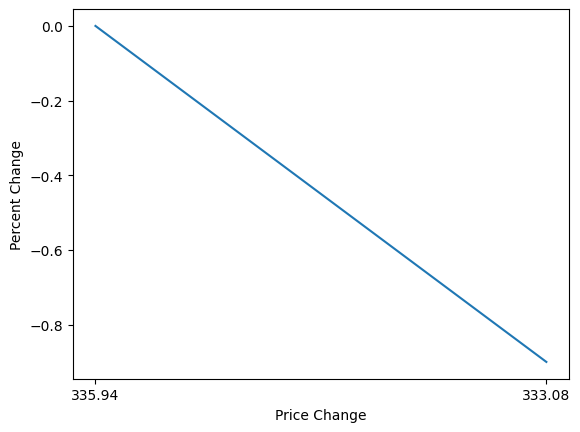

In [83]:
x_val = [old_price[1],df["Price"][1]]
y_val = [0,perc_change[1]]
plt.ylabel("Percent Change")
plt.xlabel("Price Change")
plt.plot(x_val,y_val)
plt.show()

In [92]:
def graph():
    for i in range(len(df["Price"])):
        x_val = [old_price[i],df["Price"][i]]
        y_val = [0,perc_change[i]]
        plt.title(f"{df['Name'][i]} Price Change")
        plt.ylabel("Percent Change")
        plt.xlabel("Price Change")
        plt.plot(x_val,y_val)
        plt.savefig(f'figs/{i}.png')
        plt.close()

In [93]:
graph()